# Text Processing Pipeline

## 1. Installing Modules

We are going to use two popular natural language processing tools:
SpaCy - https://spacy.io/
- Instructions to install SpaCy: https://spacy.io/usage
- Install a pretrained language model: python3 -m spacy download en_core_web_lg

NLTK - https://www.nltk.org/
- Instructions to install NLTK: https://www.nltk.org/install.html
- Install data and models from NLTK: https://www.nltk.org/data.html

In [1]:
# !pip install spacy==3.5.4

In [2]:
# !pip install nltk

### 1.2 Installing en_core_web_lg

The command `!python -m spacy download en_core_web_lg` is used to download the pretrained language model `en_core_web_lg`.

`-m spacy` -m flag tells the Python to run the SpaCy module as a script.

In [ ]:
# !pip install en_core_web_lg

ERROR: Could not find a version that satisfies the requirement en_core_web_lg (from versions: none)
ERROR: No matching distribution found for en_core_web_lg


### 1.3 Importing the modules and loading the en_core_web_ig english model.

In [9]:
import spacy

In [13]:
import spacy
nlp = spacy.load("en_core_web_lg")
import nltk

OSError: [E050] Can't find model 'en_core_web_lg'. It doesn't seem to be a Python package or a valid path to a data directory.

## 2. Tokenization

### 2.1 SpaCy

In [12]:
doc = "Good muffins cost $3.88 in Los Angeles. Mr. Lee please buy me two of them. Thanks."

nlp_doc = nlp(doc) # transform a string type variable to a spacy variable
print(nlp_doc)
sentence_list_spacy = [sentence for sentence in nlp_doc.sents]
token_list_spacy =[token for token in nlp_doc]

NameError: name 'nlp' is not defined

In [7]:
sentence_list_spacy

[Good muffins cost $3.88 in Los Angeles.,
 Mr. Lee please buy me two of them.,
 Thanks.]

In [8]:
token_list_spacy

[Good,
 muffins,
 cost,
 $,
 3.88,
 in,
 Los,
 Angeles,
 .,
 Mr.,
 Lee,
 please,
 buy,
 me,
 two,
 of,
 them,
 .,
 Thanks,
 .]

### 2.2 NLTK

In [9]:
doc = "Good muffins cost $3.88 in Los Angeles. Mr. Lee please buy me two of them. Thanks."
nltk.download('punkt_tab')# download this package for tokenization
sentence_list_nltk = nltk.sent_tokenize(doc)
token_list_nltk = nltk.word_tokenize(doc)

[nltk_data] Downloading package punkt_tab to /home/sagemaker-
[nltk_data]     user/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [10]:
sentence_list_nltk

['Good muffins cost $3.88 in Los Angeles.',
 'Mr. Lee please buy me two of them.',
 'Thanks.']

In [11]:
token_list_nltk

['Good',
 'muffins',
 'cost',
 '$',
 '3.88',
 'in',
 'Los',
 'Angeles',
 '.',
 'Mr.',
 'Lee',
 'please',
 'buy',
 'me',
 'two',
 'of',
 'them',
 '.',
 'Thanks',
 '.']

## 3. Part-Of-Speech Tagging

### 3.1 SpaCy

In [12]:
doc = "Apple is looking at buying a U.K. startup for $1 billion."
# spacy
nlp_doc = nlp(doc)
pos_tag_dict = {}
for token in nlp_doc:
    pos_tag_dict[str(token)] = token.pos_
print(pos_tag_dict)
# Spacy uses the POS-tag list from here (https://universaldependencies.org/u/pos/)

{'Apple': 'PROPN', 'is': 'AUX', 'looking': 'VERB', 'at': 'ADP', 'buying': 'VERB', 'a': 'DET', 'U.K.': 'PROPN', 'startup': 'NOUN', 'for': 'ADP', '$': 'SYM', '1': 'NUM', 'billion': 'NUM', '.': 'PUNCT'}


### 3.2 NLTK

In [13]:
nltk.download('averaged_perceptron_tagger_eng') # download this package for pos tagging
print(nltk.pos_tag(nltk.word_tokenize(doc))) # to do POS tagging in nltk, you should first tokenize a document and pass the tokenized result as a list to the pos_tag function

[('Apple', 'NNP'), ('is', 'VBZ'), ('looking', 'VBG'), ('at', 'IN'), ('buying', 'VBG'), ('a', 'DT'), ('U.K.', 'NNP'), ('startup', 'NN'), ('for', 'IN'), ('$', '$'), ('1', 'CD'), ('billion', 'CD'), ('.', '.')]


[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /home/sagemaker-user/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


## 4. Stemming

### 4.1 NLTK

In [14]:
doc = "Most of the corpora are proprietary."
stemmer = nltk.stem.PorterStemmer()
stemmed_word_list = []
for token in nltk.word_tokenize(doc):
	stemmed_word_list.append(stemmer.stem(token))
print(stemmed_word_list)

['most', 'of', 'the', 'corpora', 'are', 'proprietari', '.']


#### SpaCy doesn't have a Stemmer Tool.

## 5. Lemmatization

### 5.1 SpaCy

In [15]:
doc = "Most of the corpora are proprietary."
# spacy
nlp_doc = nlp(doc)
print([token.lemma_ for token in nlp_doc])

['Most', 'of', 'the', 'corpus', 'be', 'proprietary', '.']


### 5.2 NLTK

In [16]:
nltk.download('wordnet')
nltk.download('omw-1.4')
lemmatizer = nltk.stem.WordNetLemmatizer()
lemmatized_word_list = []
for token in nltk.word_tokenize(doc): # First, you need to tokenize a sentence
	lemmatized_word_list.append(lemmatizer.lemmatize(token))
print(lemmatized_word_list)

[nltk_data] Downloading package wordnet to /home/sagemaker-
[nltk_data]     user/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/sagemaker-
[nltk_data]     user/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


['Most', 'of', 'the', 'corpus', 'are', 'proprietary', '.']


## 6. Named Entity Recognition

### 6.1 SpaCy

In [17]:
from spacy import displacy
doc = "Apple is looking at buying a U.K. startup for $1 billion."
nlp_doc = nlp(doc)
#spacy_entity_list = []
for ent in nlp_doc.ents:
	print(ent.text, ent.label_)
displacy.render(nlp_doc, style='ent',jupyter=True)

Apple ORG
U.K. GPE
$1 billion MONEY


### 6.2 NLTK

In [18]:
nltk.download('maxent_ne_chunker_tab')
nltk.download('words')
doc = "Apple is looking at buying a U.K. startup for $1 billion."
for chunk in nltk.ne_chunk(nltk.pos_tag(nltk.word_tokenize(doc))):
	print(chunk)
for chunk in nltk.ne_chunk(nltk.pos_tag(nltk.word_tokenize(doc))):
	if hasattr(chunk, 'label'):
		print(chunk.label(), chunk[0][0])

[nltk_data] Downloading package maxent_ne_chunker_tab to
[nltk_data]     /home/sagemaker-user/nltk_data...
[nltk_data]   Package maxent_ne_chunker_tab is already up-to-date!
[nltk_data] Downloading package words to /home/sagemaker-
[nltk_data]     user/nltk_data...
[nltk_data]   Package words is already up-to-date!


(GPE Apple/NNP)
('is', 'VBZ')
('looking', 'VBG')
('at', 'IN')
('buying', 'VBG')
('a', 'DT')
('U.K.', 'NNP')
('startup', 'NN')
('for', 'IN')
('$', '$')
('1', 'CD')
('billion', 'CD')
('.', '.')
GPE Apple


## 7. Parsing

### 7.1 SpaCy

#### Dependency Tree

In [19]:
doc = nlp("Apple is looking at buying U.K. startup for $1 billion.")

for token in doc:
    print(token.text, token.lemma_, token.pos_, token.tag_, token.dep_,
            token.shape_, token.is_alpha, token.is_stop)
displacy.render(doc, style= 'dep', jupyter=True, options = {'distance': 80})

Apple Apple PROPN NNP nsubj Xxxxx True False
is be AUX VBZ aux xx True True
looking look VERB VBG ROOT xxxx True False
at at ADP IN prep xx True True
buying buy VERB VBG pcomp xxxx True False
U.K. U.K. PROPN NNP dobj X.X. False False
startup startup NOUN NN ccomp xxxx True False
for for ADP IN prep xxx True True
$ $ SYM $ quantmod $ False False
1 1 NUM CD compound d False False
billion billion NUM CD pobj xxxx True False
. . PUNCT . punct . False False


#### Noun chunks



Noun chunks are “base noun phrases” – flat phrases that have a noun as their head. You can think of noun chunks as a noun plus the words describing the noun – for example, “the lavish green grass” or “the world’s largest tech fund”. To get the noun chunks in a document, simply iterate over Doc.noun_chunks.

In [20]:
doc = nlp("Autonomous cars shift insurance liability toward manufacturers")
for chunk in doc.noun_chunks:
    print(chunk.text)
    print(chunk.text, chunk.root.text, chunk.root.dep_,chunk.root.head.text)


Autonomous cars
Autonomous cars cars nsubj shift
insurance liability
insurance liability liability dobj shift
manufacturers
manufacturers manufacturers pobj toward


## 8 Coreferene Resolution

In [21]:
!pip install coreferee


  Using cached coreferee-1.4.1-py3-none-any.whl.metadata (2.5 kB)
Using cached coreferee-1.4.1-py3-none-any.whl (182 kB)


In [22]:
!python -m coreferee install en

  Using cached https://github.com/richardpaulhudson/coreferee/raw/master/models/coreferee_model_en.zip (65.4 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for coreferee-model-en: filename=coreferee_model_en-1.0.0-py3-none-any.whl size=65422506 sha256=791eef85ecb06e0a32904559901c2a508a75f75330c7412e33834134c50f4cae
  Stored in directory: /tmp/pip-ephem-wheel-cache-td5g_wou/wheels/83/1e/76/3ee4cf4494fb88fabda6c7b90a3cfc2710610ab6068491d56f
Successfully built coreferee-model-en


In [23]:
import coreferee
nlp = spacy.load('en_core_web_lg')
nlp.add_pipe('coreferee')
doc = nlp('Although he was very busy with his work, Peter had had enough of it. He and his wife decided they needed a holiday. They travelled to Spain because they loved the country very much.')
doc._.coref_chains.print()

0: he(1), his(6), Peter(9), He(16), his(18)
1: work(7), it(14)
2: [He(16); wife(19)], they(21), They(26), they(31)
3: Spain(29), country(34)


In [24]:
print(doc._.coref_chains.resolve(doc[31]))


[Peter, wife]


## 9 Others - SpaCy X DataFrame = DframCy

In [25]:
!pip install dframcy

  Using cached dframcy-0.1.6-py3-none-any.whl.metadata (5.5 kB)
  Using cached pytest-8.3.4-py3-none-any.whl.metadata (7.5 kB)
  Using cached pytest_cov-6.0.0-py3-none-any.whl.metadata (27 kB)
  Using cached tox-4.23.2-py3-none-any.whl.metadata (3.7 kB)
  Using cached tox_travis-0.13-py2.py3-none-any.whl.metadata (2.6 kB)
  Using cached xlrd-2.0.1-py2.py3-none-any.whl.metadata (3.4 kB)
  Using cached iniconfig-2.0.0-py3-none-any.whl.metadata (2.6 kB)
  Using cached coverage-7.6.10-cp311-cp311-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (8.2 kB)
  Using cached platformdirs-4.3.6-py3-none-any.whl.metadata (11 kB)
  Using cached pyproject_api-1.8.0-py3-none-any.whl.metadata (2.7 kB)
  Using cached virtualenv-20.28.1-py3-none-any.whl.metadata (4.5 kB)
  Using cached tox-3.28.0-py2.py3-none-any.whl.metadata (7.8 kB)
  Using cached py-1.11.0-py2.py3-none-any.whl.metadata (2.8 kB)
Using cached dframcy-0.1.6-py3-none-any.whl (13 kB)
Using cach

In [26]:
import spacy
from dframcy import DframCy

nlp = spacy.load('en_core_web_lg')
dframcy = DframCy(nlp)
doc = dframcy.nlp(u'Apple is looking at buying U.K. startup for $1 billion')
annotation_dataframe = dframcy.to_dataframe(doc)
annotation_dataframe

,token_text,token_start,token_end,token_pos_,token_tag_,token_dep_,token_head,token_ent_type_
0,Apple,0,5,PROPN,NNP,nsubj,looking,ORG
1,is,6,8,AUX,VBZ,aux,looking,
2,looking,9,16,VERB,VBG,ROOT,looking,
3,at,17,19,ADP,IN,prep,looking,
4,buying,20,26,VERB,VBG,pcomp,at,
5,U.K.,27,31,PROPN,NNP,dobj,buying,GPE
6,startup,32,39,NOUN,NN,ccomp,buying,
7,for,40,43,ADP,IN,prep,buying,
8,$,44,45,SYM,$,quantmod,billion,MONEY
9,1,45,46,NUM,CD,compound,billion,MONEY


# Exploring ABC News Headline Data
## Data
https://www.kaggle.com/datasets/bansodesandeep/abc-news-sample


The data files contains two columns: published date and headline.

Note: Download the Dataset from the above source and upload it into `/sagemaker-studiolab-notebooks/` directory.

`pip install s3fs`
s3fs allows the users to mount an s3 bucket as a local file system. 


In [27]:
!pip install s3fs==2023.9.2

  Using cached s3fs-2023.9.2-py3-none-any.whl.metadata (1.6 kB)
  Using cached aiobotocore-2.5.4-py3-none-any.whl.metadata (19 kB)
  Using cached fsspec-2023.9.2-py3-none-any.whl.metadata (6.7 kB)
  Using cached botocore-1.31.17-py3-none-any.whl.metadata (5.9 kB)
Using cached s3fs-2023.9.2-py3-none-any.whl (28 kB)
Using cached fsspec-2023.9.2-py3-none-any.whl (173 kB)
Using cached aiobotocore-2.5.4-py3-none-any.whl (73 kB)
Using cached botocore-1.31.17-py3-none-any.whl (11.1 MB)
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2023.6.0
    Uninstalling fsspec-2023.6.0:
      Successfully uninstalled fsspec-2023.6.0
  Attempting uninstall: botocore
    Found existing installation: botocore 1.34.162
    Uninstalling botocore-1.34.162:
      Successfully uninstalled botocore-1.34.162
  Attempting uninstall: aiobotocore
    Found existing installation: aiobotocore 2.13.3
    Uninstalling aiobotocore-2.13.3:
      Successfully uninstalled aiobotocore-2.13.3
ERROR: pip'

In [28]:
import pandas as pd
import spacy #load spacy
import s3fs
nlp = spacy.load("en_core_web_lg")
from collections import defaultdict, Counter
from spacy.matcher import Matcher
import pprint

fs = s3fs.S3FileSystem(anon=False)
s3_bucket_path='s3://amazon-sagemaker-058264306111-us-east-1-e23504aef6c5/dzd_5l5kah6gnsnq3r/bzbm82rtfbxpgn/dev/'# s3
data = pd.read_csv(s3_bucket_path+'abcnews_sample.csv') #replace the path with s3 bucket
data

,publish_date,headline_text
0,20050627,lawyer claims aust govt has abandoned corby
1,20051206,singapore tells spouses of patients hiv status
2,20141119,iron ore price slumps to new five year low
3,20060203,youth crime prevention schemes share in funds
4,20190521,harry triguboff speaks to the business
...,...,...
19995,20110721,tourist numbers down 20 percent in top end
19996,20170219,majority of emergency beacon activations last ...
19997,20110707,livingstone pokie reform is about people
19998,20150916,tree clearing heats up labor


## Processing the Dataframe

In [29]:
nouns = []
verbs = []
for title in data['headline_text']:
    try:
        doc=nlp(title)
        for token in doc:
            if token.pos_ == 'VERB':
                verbs.append(token.lemma_)
            if token.pos_ == 'NOUN':
                nouns.append(token.lemma_)
    except TypeError:
        pass

In [30]:
noun_counter = Counter(nouns)
verb_counter = Counter(verbs)

## Top 25 Nouns Used the News Headlines

In [31]:
print(len(noun_counter))
pprint.pprint(noun_counter.most_common(25))

6697
[('police', 666),
 ('man', 565),
 ('fire', 264),
 ('court', 255),
 ('plan', 243),
 ('death', 234),
 ('year', 231),
 ('woman', 220),
 ('health', 205),
 ('crash', 196),
 ('water', 191),
 ('murder', 175),
 ('change', 173),
 ('nsw', 170),
 ('car', 168),
 ('market', 160),
 ('report', 159),
 ('child', 159),
 ('day', 157),
 ('attack', 156),
 ('hospital', 151),
 ('school', 151),
 ('charge', 150),
 ('government', 144),
 ('election', 142)]


In [33]:
!pip install wordcloud

  Using cached wordcloud-1.9.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (3.4 kB)
Using cached wordcloud-1.9.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (547 kB)


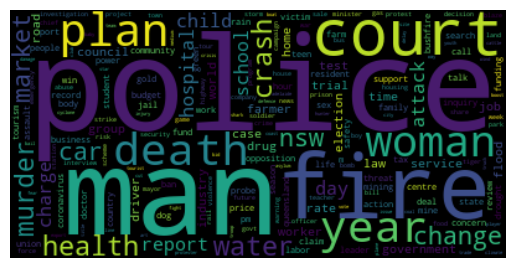

In [34]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud()
wordcloud.generate_from_frequencies(noun_counter)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## Top 25 Verbs Used in News Headlines

In [35]:
print(len(verb_counter))
pprint.pprint(verb_counter.most_common(25))

2308
[('say', 465),
 ('kill', 259),
 ('call', 258),
 ('find', 249),
 ('urge', 249),
 ('take', 223),
 ('face', 208),
 ('get', 202),
 ('win', 199),
 ('charge', 185),
 ('warn', 174),
 ('miss', 174),
 ('make', 172),
 ('seek', 170),
 ('accuse', 168),
 ('die', 161),
 ('hit', 157),
 ('go', 136),
 ('want', 133),
 ('set', 132),
 ('continue', 131),
 ('tell', 121),
 ('help', 113),
 ('consider', 107),
 ('defend', 107)]


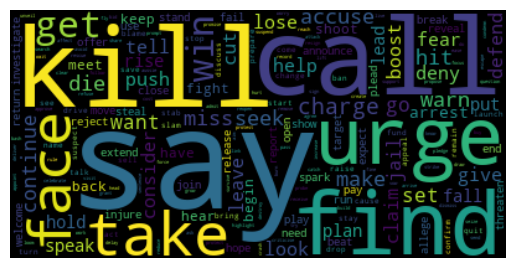

In [36]:
wordcloud = WordCloud()
wordcloud.generate_from_frequencies(verb_counter)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()